In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import datetime

In [ ]:
warnings.filterwarnings('ignore')
df1 = pd.read_csv("/content/drive/MyDrive/cipla loan /train.csv")
df2 = pd.read_csv("/content/drive/MyDrive/cipla loan /test.csv")

In [ ]:
df1

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,M,38,4969.41,Low,Commercial associate,Managers,Urban,76657.90,722.34,Y,Y,2.0,869.61,0,Unpossessed,566,4969.41,4,Urban,1,111096.56,68992.11
29996,C-32511,Silas Slaugh,M,20,1606.88,Low,Working,Laborers,Semi-Urban,66595.14,253.04,N,N,3.0,729.41,0,Inactive,175,1606.88,3,Urban,1,73453.94,46616.60
29997,C-5192,Carmelo Lone,F,49,NaN,Low,Working,Sales staff,Urban,81410.08,583.11,N,Y,NaN,NaN,0,Active,959,NaN,1,Rural,1,102108.02,61057.56
29998,C-12172,Carolann Osby,M,38,2417.71,Low,Working,Security staff,Semi-Urban,142524.10,378.29,N,Y,3.0,677.27,1,Unpossessed,375,2417.71,4,Urban,1,168194.47,99766.87


In [ ]:
df2

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,396.72,N,N,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,463.76,Y,Y,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,493.15,N,Y,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,446.15,N,Y,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,370.10,N,N,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,C-9076,Tobias Davilla,F,19,1349.60,Low,Commercial associate,NaN,Semi-Urban,156766.97,500.59,Y,Y,4.0,684.32,0,Inactive,681,1349.60,4,Semi-Urban,1,212778.0
19996,C-17587,Evelina Hodges,M,22,2019.78,Low,Working,Core staff,Urban,47924.80,243.02,Y,Y,NaN,706.34,0,Inactive,213,2019.78,4,Urban,1,90816.95
19997,C-46479,Karlyn Mckinzie,M,19,2252.03,Low,Working,Core staff,Semi-Urban,18629.88,101.88,Y,N,1.0,656.46,0,Inactive,270,2252.03,2,Rural,0,21566.27
19998,C-3099,Mariana Pulver,F,21,1845.35,Low,Working,NaN,Semi-Urban,95430.73,271.31,N,Y,2.0,865.46,0,Unpossessed,489,1845.35,1,Semi-Urban,1,120281.17


In [ ]:
df1.columns = df1.columns.str.replace(' ','_')
df1.rename(columns={'Income_(USD)':'Income','Loan_Amount_Request_(USD)':'Loan_Amount_Request','Current_Loan_Expenses_(USD)':'Current_Loan_Expenses','Loan_Sanction_Amount_(USD)':'Loan_Sanction_Amount','No._of_Defaults':'No_of_Defaults'}, inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             30000 non-null  object 
 1   Name                    30000 non-null  object 
 2   Gender                  29947 non-null  object 
 3   Age                     30000 non-null  int64  
 4   Income                  25424 non-null  float64
 5   Income_Stability        28317 non-null  object 
 6   Profession              30000 non-null  object 
 7   Type_of_Employment      22730 non-null  object 
 8   Location                30000 non-null  object 
 9   Loan_Amount_Request     30000 non-null  float64
 10  Current_Loan_Expenses   29828 non-null  float64
 11  Expense_Type_1          30000 non-null  object 
 12  Expense_Type_2          30000 non-null  object 
 13  Dependents              27507 non-null  float64
 14  Credit_Score            28297 non-null

In [ ]:
df1.isna().sum()

Customer_ID                  0
Name                         0
Gender                      53
Age                          0
Income                    4576
Income_Stability          1683
Profession                   0
Type_of_Employment        7270
Location                     0
Loan_Amount_Request          0
Current_Loan_Expenses      172
Expense_Type_1               0
Expense_Type_2               0
Dependents                2493
Credit_Score              1703
No_of_Defaults               0
Has_Active_Credit_Card    1566
Property_ID                  0
Property_Age              4850
Property_Type                0
Property_Location          356
Co-Applicant                 0
Property_Price               0
Loan_Sanction_Amount       340
dtype: int64

In [ ]:
df1.drop(columns=['Property_Age'],inplace=True)

In [ ]:
#traindf = pd.DataFrame(columns = Names)
traindf = df1[['Loan_Amount_Request','Current_Loan_Expenses','Credit_Score','Property_Price','Loan_Sanction_Amount']]

In [ ]:
traindf

,Loan_Amount_Request,Current_Loan_Expenses,Credit_Score,Property_Price,Loan_Sanction_Amount
0,72809.58,241.08,809.44,119933.46,54607.18
1,46837.47,495.81,780.40,54791.00,37469.98
2,45593.04,171.95,833.15,72440.58,36474.43
3,80057.92,298.54,832.70,121441.51,56040.54
4,113858.89,491.41,745.55,208567.91,74008.28
...,...,...,...,...,...
29995,76657.90,722.34,869.61,111096.56,68992.11
29996,66595.14,253.04,729.41,73453.94,46616.60
29997,81410.08,583.11,NaN,102108.02,61057.56
29998,142524.10,378.29,677.27,168194.47,99766.87


In [ ]:
traindf.dropna(inplace=True)
traindf

,Loan_Amount_Request,Current_Loan_Expenses,Credit_Score,Property_Price,Loan_Sanction_Amount
0,72809.58,241.08,809.44,119933.46,54607.18
1,46837.47,495.81,780.40,54791.00,37469.98
2,45593.04,171.95,833.15,72440.58,36474.43
3,80057.92,298.54,832.70,121441.51,56040.54
4,113858.89,491.41,745.55,208567.91,74008.28
...,...,...,...,...,...
29993,9811.65,107.88,709.43,17956.31,6377.57
29995,76657.90,722.34,869.61,111096.56,68992.11
29996,66595.14,253.04,729.41,73453.94,46616.60
29998,142524.10,378.29,677.27,168194.47,99766.87


In [ ]:
df2

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,396.72,N,N,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,463.76,Y,Y,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,493.15,N,Y,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,446.15,N,Y,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,370.10,N,N,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,C-9076,Tobias Davilla,F,19,1349.60,Low,Commercial associate,NaN,Semi-Urban,156766.97,500.59,Y,Y,4.0,684.32,0,Inactive,681,1349.60,4,Semi-Urban,1,212778.0
19996,C-17587,Evelina Hodges,M,22,2019.78,Low,Working,Core staff,Urban,47924.80,243.02,Y,Y,NaN,706.34,0,Inactive,213,2019.78,4,Urban,1,90816.95
19997,C-46479,Karlyn Mckinzie,M,19,2252.03,Low,Working,Core staff,Semi-Urban,18629.88,101.88,Y,N,1.0,656.46,0,Inactive,270,2252.03,2,Rural,0,21566.27
19998,C-3099,Mariana Pulver,F,21,1845.35,Low,Working,NaN,Semi-Urban,95430.73,271.31,N,Y,2.0,865.46,0,Unpossessed,489,1845.35,1,Semi-Urban,1,120281.17


In [ ]:
testdf = df2
testdf

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,396.72,N,N,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,463.76,Y,Y,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,493.15,N,Y,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,446.15,N,Y,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,370.10,N,N,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,C-9076,Tobias Davilla,F,19,1349.60,Low,Commercial associate,NaN,Semi-Urban,156766.97,500.59,Y,Y,4.0,684.32,0,Inactive,681,1349.60,4,Semi-Urban,1,212778.0
19996,C-17587,Evelina Hodges,M,22,2019.78,Low,Working,Core staff,Urban,47924.80,243.02,Y,Y,NaN,706.34,0,Inactive,213,2019.78,4,Urban,1,90816.95
19997,C-46479,Karlyn Mckinzie,M,19,2252.03,Low,Working,Core staff,Semi-Urban,18629.88,101.88,Y,N,1.0,656.46,0,Inactive,270,2252.03,2,Rural,0,21566.27
19998,C-3099,Mariana Pulver,F,21,1845.35,Low,Working,NaN,Semi-Urban,95430.73,271.31,N,Y,2.0,865.46,0,Unpossessed,489,1845.35,1,Semi-Urban,1,120281.17


In [ ]:
testdf.columns = testdf.columns.str.replace(' ','_')
testdf.rename(columns={'Income_(USD)':'Income','Loan_Amount_Request_(USD)':'Loan_Amount_Request','Current_Loan_Expenses_(USD)':'Current_Loan_Expenses'}, inplace=True)
testdf

,Customer_ID,Name,Gender,Age,Income,Income_Stability,Profession,Type_of_Employment,Location,Loan_Amount_Request,Current_Loan_Expenses,Expense_Type_1,Expense_Type_2,Dependents,Credit_Score,No._of_Defaults,Has_Active_Credit_Card,Property_ID,Property_Age,Property_Type,Property_Location,Co-Applicant,Property_Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,396.72,N,N,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,463.76,Y,Y,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,493.15,N,Y,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,446.15,N,Y,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,370.10,N,N,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,C-9076,Tobias Davilla,F,19,1349.60,Low,Commercial associate,NaN,Semi-Urban,156766.97,500.59,Y,Y,4.0,684.32,0,Inactive,681,1349.60,4,Semi-Urban,1,212778.0
19996,C-17587,Evelina Hodges,M,22,2019.78,Low,Working,Core staff,Urban,47924.80,243.02,Y,Y,NaN,706.34,0,Inactive,213,2019.78,4,Urban,1,90816.95
19997,C-46479,Karlyn Mckinzie,M,19,2252.03,Low,Working,Core staff,Semi-Urban,18629.88,101.88,Y,N,1.0,656.46,0,Inactive,270,2252.03,2,Rural,0,21566.27
19998,C-3099,Mariana Pulver,F,21,1845.35,Low,Working,NaN,Semi-Urban,95430.73,271.31,N,Y,2.0,865.46,0,Unpossessed,489,1845.35,1,Semi-Urban,1,120281.17


In [ ]:
testdf = testdf[['Loan_Amount_Request','Current_Loan_Expenses','Credit_Score','Property_Price']]
testdf

,Loan_Amount_Request,Current_Loan_Expenses,Credit_Score,Property_Price
0,137088.98,396.72,799.14,236644.5
1,104771.59,463.76,833.31,142357.3
2,176684.91,493.15,627.44,300991.24
3,97009.18,446.15,833.20,125612.1
4,109980.00,370.10,NaN,180908.0
...,...,...,...,...
19995,156766.97,500.59,684.32,212778.0
19996,47924.80,243.02,706.34,90816.95
19997,18629.88,101.88,656.46,21566.27
19998,95430.73,271.31,865.46,120281.17


In [ ]:
testdf.dropna(inplace=True)
testdf.isna().sum()

Loan_Amount_Request      0
Current_Loan_Expenses    0
Credit_Score             0
Property_Price           0
dtype: int64

In [ ]:
testdf

,Loan_Amount_Request,Current_Loan_Expenses,Credit_Score,Property_Price
0,137088.98,396.72,799.14,236644.5
1,104771.59,463.76,833.31,142357.3
2,176684.91,493.15,627.44,300991.24
3,97009.18,446.15,833.20,125612.1
5,31465.78,153.10,620.58,51075.31
...,...,...,...,...
19995,156766.97,500.59,684.32,212778.0
19996,47924.80,243.02,706.34,90816.95
19997,18629.88,101.88,656.46,21566.27
19998,95430.73,271.31,865.46,120281.17


In [ ]:
traindf

,Loan_Amount_Request,Current_Loan_Expenses,Credit_Score,Property_Price,Loan_Sanction_Amount
0,72809.58,241.08,809.44,119933.46,54607.18
1,46837.47,495.81,780.40,54791.00,37469.98
2,45593.04,171.95,833.15,72440.58,36474.43
3,80057.92,298.54,832.70,121441.51,56040.54
4,113858.89,491.41,745.55,208567.91,74008.28
...,...,...,...,...,...
29993,9811.65,107.88,709.43,17956.31,6377.57
29995,76657.90,722.34,869.61,111096.56,68992.11
29996,66595.14,253.04,729.41,73453.94,46616.60
29998,142524.10,378.29,677.27,168194.47,99766.87


In [ ]:
traindf = traindf[traindf['Current_Loan_Expenses']>0]
traindf = traindf[traindf['Property_Price']>0]
traindf

,Loan_Amount_Request,Current_Loan_Expenses,Credit_Score,Property_Price,Loan_Sanction_Amount
0,72809.58,241.08,809.44,119933.46,54607.18
1,46837.47,495.81,780.40,54791.00,37469.98
2,45593.04,171.95,833.15,72440.58,36474.43
3,80057.92,298.54,832.70,121441.51,56040.54
4,113858.89,491.41,745.55,208567.91,74008.28
...,...,...,...,...,...
29993,9811.65,107.88,709.43,17956.31,6377.57
29995,76657.90,722.34,869.61,111096.56,68992.11
29996,66595.14,253.04,729.41,73453.94,46616.60
29998,142524.10,378.29,677.27,168194.47,99766.87


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

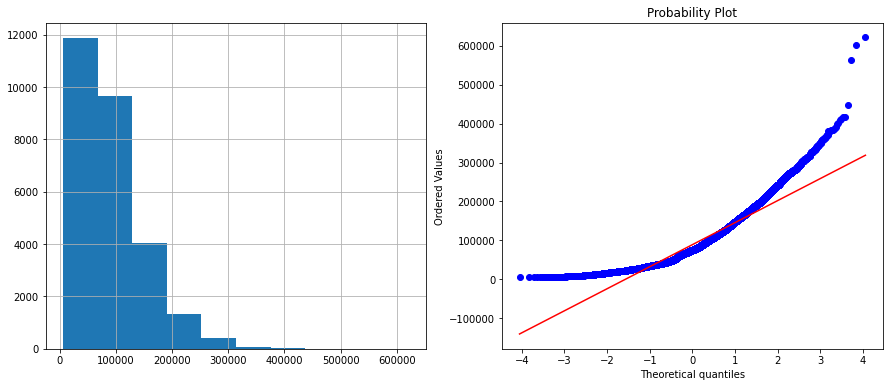

In [ ]:
diagnostic_plots(traindf, 'Loan_Amount_Request')   #box cox

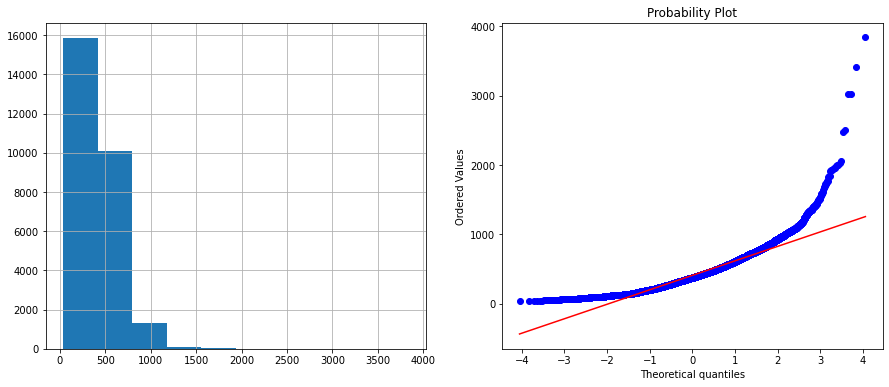

In [ ]:
diagnostic_plots(traindf, 'Current_Loan_Expenses')   #log transform

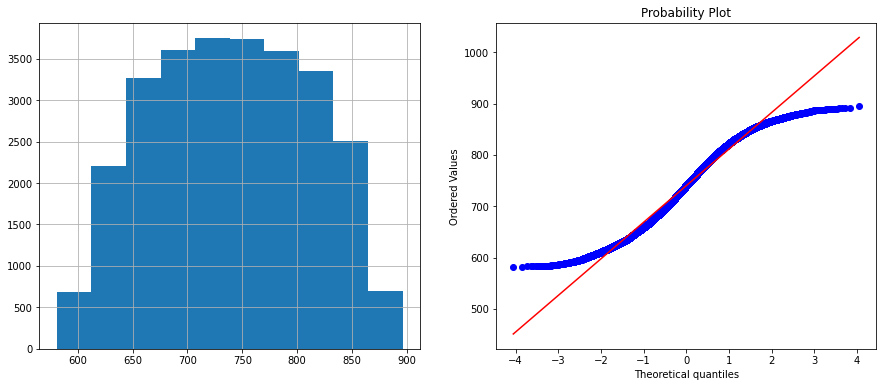

In [ ]:
diagnostic_plots(traindf, 'Credit_Score')      # not needed to transform

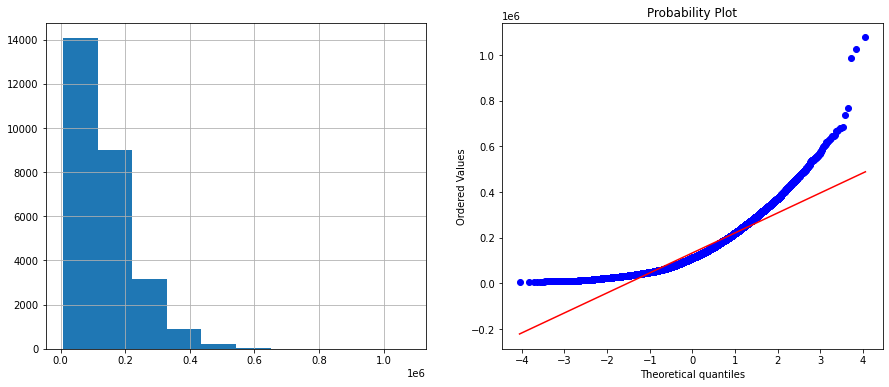

In [ ]:
diagnostic_plots(traindf, 'Property_Price')       #box cox

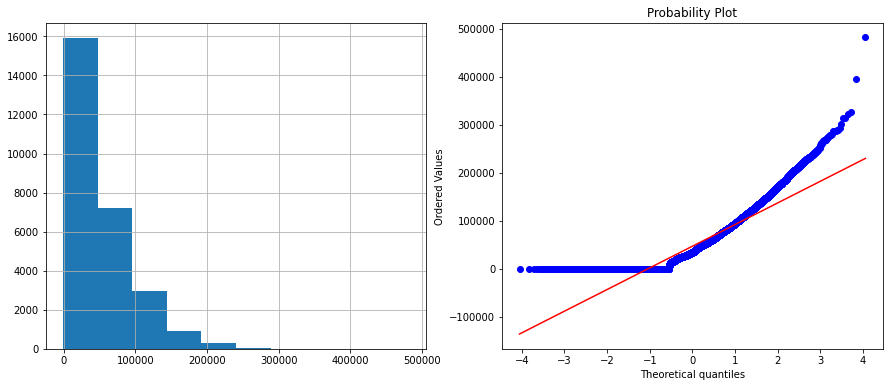

In [ ]:
diagnostic_plots(traindf, 'Loan_Sanction_Amount')

In [ ]:
#import numpy as np
#traindf['log_target3'] = np.log1p(traindf["Property_Price"])
#traindf['sqrt_target3'] = traindf["Property_Price"]**(1/2)
#traindf['reciprocal_target3'] = 1/traindf["Property_Price"]
#from scipy.stats import boxcox
#traindf ['bcx_target3'], lam = boxcox(traindf["Property_Price"])
#traindf

In [ ]:
traindf

,Loan_Amount_Request,Current_Loan_Expenses,Credit_Score,Property_Price,Loan_Sanction_Amount
0,72809.58,241.08,809.44,119933.46,54607.18
1,46837.47,495.81,780.40,54791.00,37469.98
2,45593.04,171.95,833.15,72440.58,36474.43
3,80057.92,298.54,832.70,121441.51,56040.54
4,113858.89,491.41,745.55,208567.91,74008.28
...,...,...,...,...,...
29993,9811.65,107.88,709.43,17956.31,6377.57
29995,76657.90,722.34,869.61,111096.56,68992.11
29996,66595.14,253.04,729.41,73453.94,46616.60
29998,142524.10,378.29,677.27,168194.47,99766.87


In [ ]:
y=traindf.iloc[0:,-1]
y
X=traindf.iloc[0:,0:-1]
X

,Loan_Amount_Request,Current_Loan_Expenses,Credit_Score,Property_Price
0,72809.58,241.08,809.44,119933.46
1,46837.47,495.81,780.40,54791.00
2,45593.04,171.95,833.15,72440.58
3,80057.92,298.54,832.70,121441.51
4,113858.89,491.41,745.55,208567.91
...,...,...,...,...
29993,9811.65,107.88,709.43,17956.31
29995,76657.90,722.34,869.61,111096.56
29996,66595.14,253.04,729.41,73453.94
29998,142524.10,378.29,677.27,168194.47


In [ ]:
y

0         54607.18
1         37469.98
2         36474.43
3         56040.54
4         74008.28
           ...    
29993      6377.57
29995     68992.11
29996     46616.60
29998     99766.87
29999    117217.90
Name: Loan_Sanction_Amount, Length: 27386, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print("Shape of x_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (19170, 4)
Shape of y_train : (19170,)
Shape of x_test : (8216, 4)
Shape of y_test : (8216,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model1 = LinearRegression()
model2 = RandomForestRegressor()
model3 = SVR()
model4 = KNeighborsRegressor()
model5 = AdaBoostRegressor()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)

lg_pred = model1.predict(X_test)
rf_pred = model2.predict(X_test)
svr_pred = model3.predict(X_test)
knn_pred = model4.predict(X_test)
ada_pred = model5.predict(X_test)


mse = mean_squared_error(y_test, lg_pred)
print("Mean Squared Error :", np.sqrt(mse))
r2 = r2_score(y_test, lg_pred)
print("The r2 score :", r2)
print('---'*10)
mse = mean_squared_error(y_test, rf_pred)
print("Mean Squared Error :", np.sqrt(mse))
r2 = r2_score(y_test, rf_pred)
print("The r2 score :", r2)
print('---'*10)
mse = mean_squared_error(y_test, svr_pred)
print("Mean Squared Error :", np.sqrt(mse))
r2 = r2_score(y_test, svr_pred)
print("The r2 score :", r2)
print('---'*10)
mse = mean_squared_error(y_test, knn_pred)
print("Mean Squared Error :", np.sqrt(mse))
r2 = r2_score(y_test, knn_pred)
print("The r2 score :", r2)
print('---'*10)
mse = mean_squared_error(y_test, ada_pred)
print("Mean Squared Error :", np.sqrt(mse))
r2 = r2_score(y_test, ada_pred)
print("The r2 score :", r2)

Mean Squared Error : 31644.030169988066
The r2 score : 0.5677404011928316
------------------------------
Mean Squared Error : 29723.36461547604
The r2 score : 0.618620799291818
------------------------------
Mean Squared Error : 48251.344242871986
The r2 score : -0.005032023814175224
------------------------------
Mean Squared Error : 36546.97525298199
The r2 score : 0.4234141972872013
------------------------------
Mean Squared Error : 33821.69954913881
The r2 score : 0.5061990504991185


In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# getting the rmse score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error :", np.sqrt(mse))
# getting the r2_score
r2 = r2_score(y_test, y_pred)
print("The r2 score :", r2)

Mean Squared Error : 29694.393063942498
The r2 score : 0.6193639024009838


In [ ]:

from xgboost.sklearn import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

# getting the rmse score
mse = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error :", np.sqrt(mse))
# getting the r2_score
r2 = r2_score(y_test, y_pred_xgb)
print("The r2 score :", r2)

[06:19:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error : 28832.90855808488
The r2 score : 0.6411293217355996


In [79]:
from sklearn.linear_model import Ridge
ridgeR = Ridge(alpha = 1)
ridgeR.fit(X_train, y_train)
y_pred_rid = ridgeR.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rid)
print("Mean Squared Error :", np.sqrt(mse))
# getting the r2_score
r2 = r2_score(y_test, y_pred_rid)
print("The r2 score :", r2)

Mean Squared Error : 31644.030168054764
The r2 score : 0.5677404012456497


In [80]:
from sklearn.linear_model import Lasso
 
# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(X_train, y_train)
y_pred_las = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred_las)
print("Mean Squared Error :", np.sqrt(mse))
# getting the r2_score
r2 = r2_score(y_test, y_pred_las)
print("The r2 score :", r2)

Mean Squared Error : 31644.029849271374
The r2 score : 0.5677404099548552
